### Syed Muhammad Zaid | 20B-052-SE

##### Task - 1

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)


kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_

centroids = kmeans.cluster_centers_

print("Cluster labels:", cluster_labels)
print("Centroids:", centroids)

Cluster labels: [3 1 1 1 3 3 1 3 1 1 3 1 1 1 3 3 3 3 3 3 3 3 3 1 1 1 3 3 3 1 1 3 3 3 1 1 3
 3 1 3 3 1 1 3 3 1 3 1 3 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Centroids: [[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.35230687  0.11914427 -1.31439133 -1.29749445]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-0.74922133  1.43007001 -1.29759846 -1.22142131]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


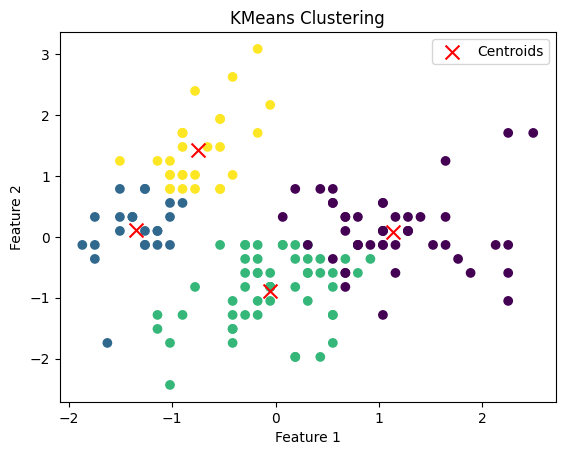

In [6]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

##### Task - 2


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


##### Task - 3


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [10]:
iris = load_iris()
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


##### Task - 4


In [11]:
import numpy as np

def calculate_variance(values):
    """
    Calculate the variance of a set of values.

    Parameters:
    values (array-like): The input values.

    Returns:
    float: The variance of the input values.
    """
    return np.var(values)

def weighted_variance(data, targets, feature, threshold):
    """
    Compute the weighted variance of a split.

    Parameters:
    data (numpy.ndarray): The input data with descriptive features.
    targets (array-like): The target values.
    feature (int): The index of the descriptive feature to split on.
    threshold (float): The threshold value for splitting the feature.

    Returns:
    float: The weighted variance of the split.
    """
    # Split the target data based on the threshold
    left_indices = data[:, feature] <= threshold
    right_indices = ~left_indices

    # Calculate variance for left and right subsets
    left_variance = calculate_variance(targets[left_indices])
    right_variance = calculate_variance(targets[right_indices])

    # Calculate the weighted variance
    left_weight = len(targets[left_indices]) / len(targets)
    right_weight = len(targets[right_indices]) / len(targets)
    weighted_var = (left_weight * left_variance) + (right_weight * right_variance)

    return weighted_var

def find_best_threshold_by_variance(data, targets, feature):
    """
    Find the best threshold for a given feature based on weighted variance.

    Parameters:
    data (numpy.ndarray): The input data with descriptive features.
    targets (array-like): The target values.
    feature (int): The index of the descriptive feature to split on.

    Returns:
    tuple: A tuple containing the best threshold and the corresponding weighted variance.
    """
    unique_values = np.unique(data[:, feature])
    best_threshold = None
    best_weighted_var = float('inf')  # Start with a high value

    # Loop through unique values to find the threshold with the minimum weighted variance
    for threshold in unique_values:
        w_var = weighted_variance(data, targets, feature, threshold)
        if w_var < best_weighted_var:
            best_weighted_var = w_var
            best_threshold = threshold

    return best_threshold, best_weighted_var

# Example dataset with continuous descriptive and target features
data = np.array([
    [1, 2],
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 6]
])
targets = np.array([10, 20, 30, 40, 50])  # Continuous target feature

# Find the best split based on weighted variance for the first feature
feature_index = 0  # Index of the descriptive feature to split on
best_threshold, best_weighted_var = find_best_threshold_by_variance(data, targets, feature_index)
print(f"Best threshold for splitting feature {feature_index}: {best_threshold}")
print(f"Weighted variance after split: {best_weighted_var}")

Best threshold for splitting feature 0: 2
Weighted variance after split: 50.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


##### Task - 5


In [12]:
class Node:
    """
    Class representing a node in a decision tree.

    Attributes:
    attribute (int): Index of the attribute to split on.
    threshold (float): Threshold for continuous attributes.
    value (str or float): Value representing a class or a continuous output.
    branches (dict): Dictionary of child nodes keyed by branch description.
    """

    def __init__(self, attribute=None, threshold=None, value=None, branches=None):
        """
        Initialize a Node object.

        Parameters:
        attribute (int): Index of the attribute to split on.
        threshold (float): Threshold for continuous attributes.
        value (str or float): Value representing a class or a continuous output.
        branches (dict): Dictionary of child nodes keyed by branch description.
        """
        self.attribute = attribute
        self.threshold = threshold
        self.value = value
        self.branches = branches or {}

def print_tree(node, level=0):
    """
    Recursively print the decision tree.

    Parameters:
    node (Node): The root node of the decision tree.
    level (int): The current level of the tree (used for indentation).
    """
    indent = " " * level  # Indentation for nested structure
    if node.value is not None:
        # If it's a leaf node, print the value (class or regression output)
        print(f"{indent}Leaf: {node.value}")
    else:
        # If it's an internal node, print the attribute and threshold
        attribute_info = f"Node: Split on attribute {node.attribute} with threshold {node.threshold}"
        print(f"{indent}{attribute_info}")
        # Recur for each branch in the node's branches
        for branch_key, branch in node.branches.items():
            print(f"{indent}- {branch_key}:")
            print_tree(branch, level + 1)

In [13]:
# Create leaf nodes
leaf1 = Node(value="Class A")
leaf2 = Node(value="Class B")
leaf3 = Node(value="Class C")

# Create internal nodes with branches
branch1 = Node(attribute=1, threshold=2.5, branches={"<= 2.5": leaf1, "> 2.5": leaf2})
root = Node(attribute=0, threshold=1.5, branches={"<= 1.5": branch1, "> 1.5": leaf3})

# Print the tree
print_tree(root)

Node: Split on attribute 0 with threshold 1.5
- <= 1.5:
 Node: Split on attribute 1 with threshold 2.5
 - <= 2.5:
  Leaf: Class A
 - > 2.5:
  Leaf: Class B
- > 1.5:
 Leaf: Class C
